In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv(r"C:\Users\manna\OneDrive\Desktop\Ml\archive\train_u6lujuX_CVtuZ9i.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [179]:
data.shape

(569, 12)

In [38]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [39]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [40]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [41]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
#We have two types of Data
#-Numerical
#-categorical



In [108]:
data['Gender']= data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']= data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']= data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']= data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [109]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [110]:
data['LoanAmount']= data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term']= data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History']= data['Credit_History'].fillna(data['Credit_History'].median())

In [111]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection and Handling

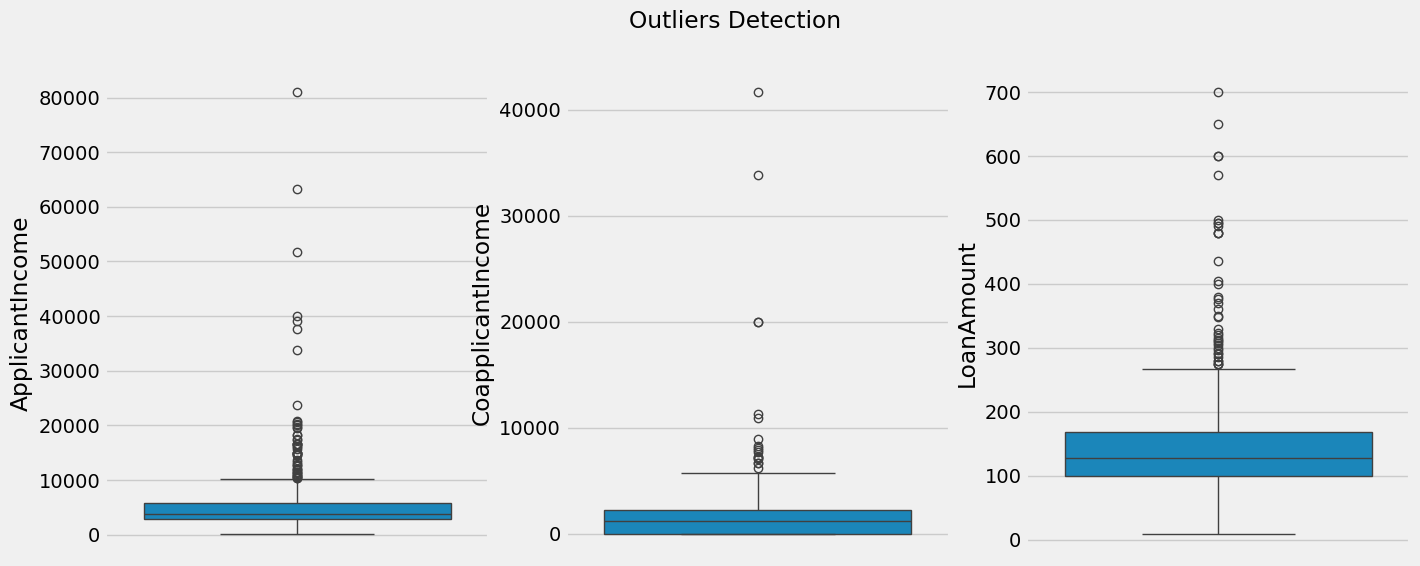

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,6)
plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])
plt.suptitle('Outliers Detection')
plt.show()

In [45]:
print("Before Removing the outliers", data.shape)
data= data[data['ApplicantIncome']<25000]
print("After Removing the outliers", data.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [46]:
print("Before Removing the outliers", data.shape)
data= data[data['CoapplicantIncome']<12000]
print("After Removing the outliers", data.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [47]:
print("Before Removing the outliers", data.shape)
data= data[data['LoanAmount']<400]
print("After Removing the outliers", data.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (569, 13)


# Analysis

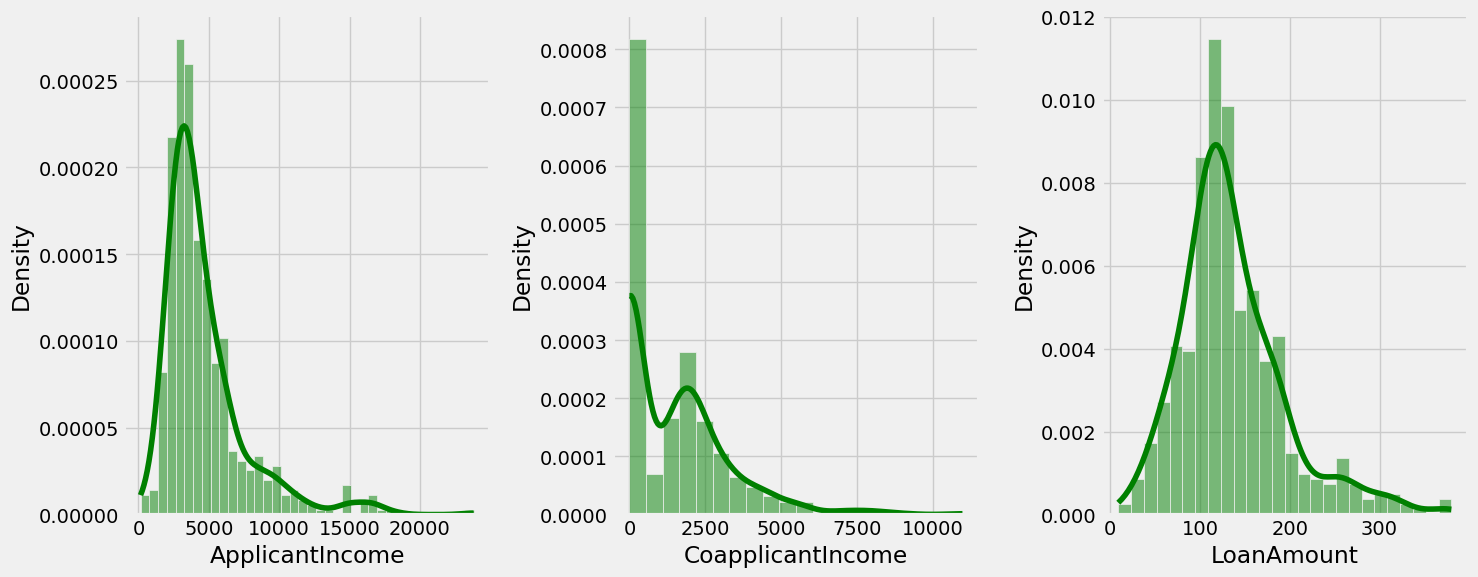

In [48]:
plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'], color='green', stat='density', kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'], color='green', stat='density', kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'], color='green', stat='density', kde=True)

plt.tight_layout()
plt.show()

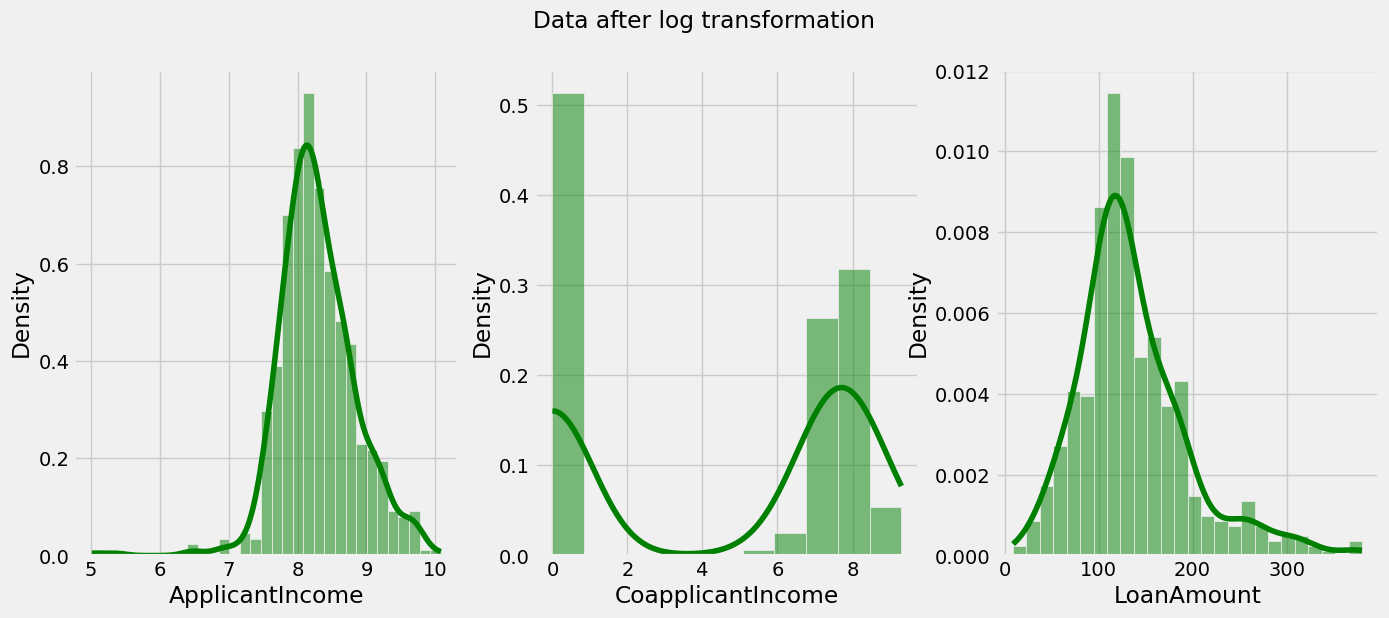

In [49]:
data['ApplicantIncome'] = np.log1p(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.histplot(data['ApplicantIncome'], color='green', stat='density', kde=True)

plt.subplot(1,3,2)
sns.histplot(data['CoapplicantIncome'], color='green', stat='density', kde=True)

plt.subplot(1,3,3)
sns.histplot(data['LoanAmount'], color='green', stat='density', kde=True)

plt.suptitle("Data after log transformation")
plt.show()



In [50]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [51]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [52]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

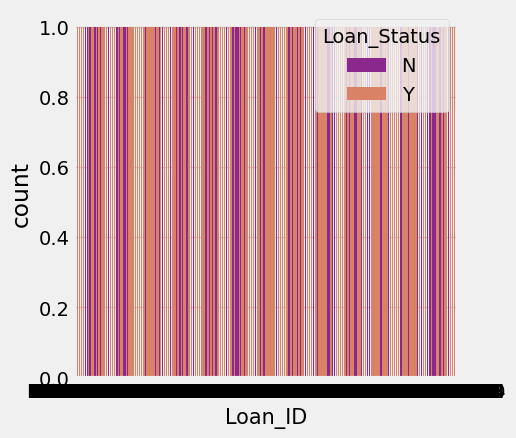

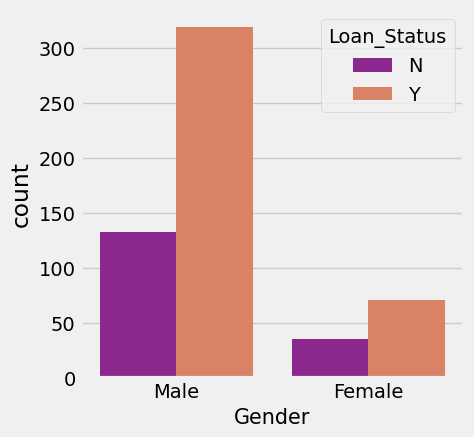

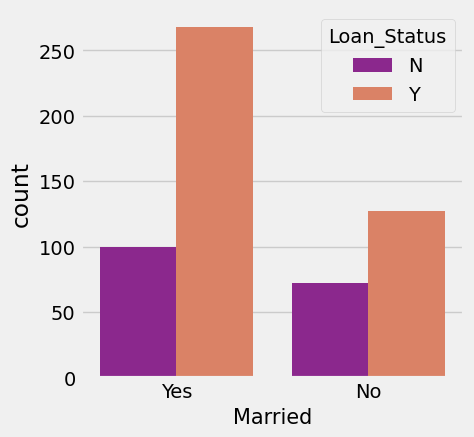

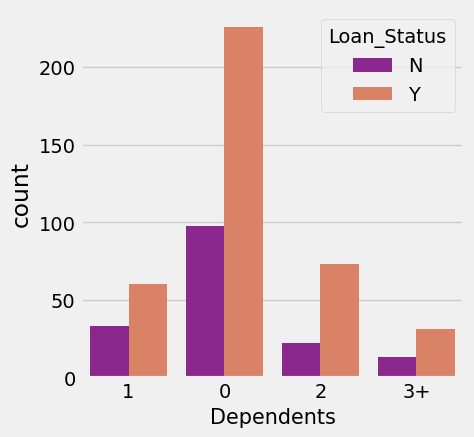

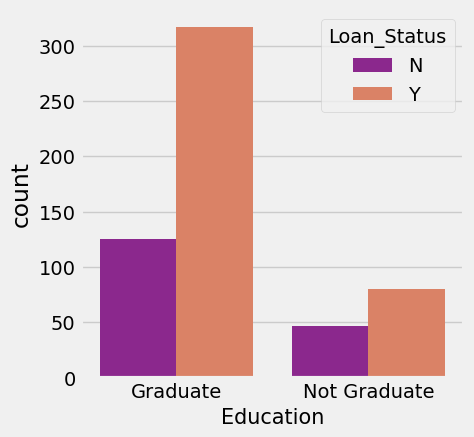

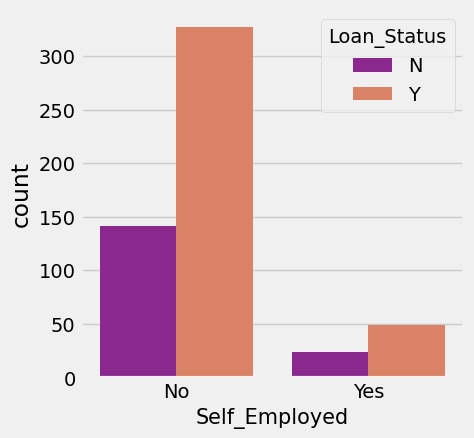

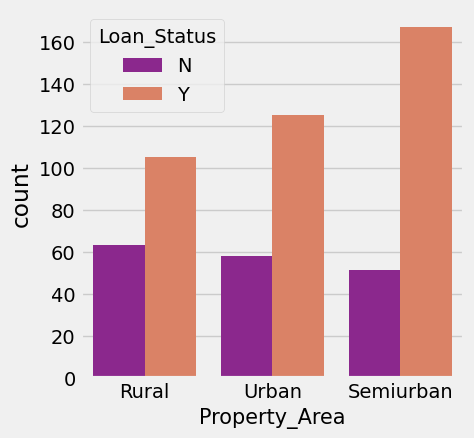

In [54]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i, hue = 'Loan_Status', data = data, palette = 'plasma')
    plt.xlabel(i, fontsize=15)

In [55]:
# Plot categorical data with Target data

print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             72  100
Y            127  268


In [56]:
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 125            47
Y                 317            80


In [57]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 63         51     58
Y                105        167    125


In [58]:
print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              141   24
Y              327   49


In [62]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y


In [65]:
data=data.drop(['Loan_ID'], axis=1)

In [61]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y


In [66]:
data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate', 'Not Graduate'),(1,0))

C:\Users\manna\AppData\Local\Temp\ipykernel_33600\3314302640.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(('Male', 'Female'),(1,0))
C:\Users\manna\AppData\Local\Temp\ipykernel_33600\3314302640.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Married'] = data['Married'].replace(('Yes', 'No'),(1,0))
C:\Users\manna\AppData\Local\Temp\ipykernel_33600\3314302640.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

In [67]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,1,No,8.430327,7.319202,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0,1,Yes,8.006701,0.000000,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0,0,No,7.857094,7.765993,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0,1,No,8.699681,0.000000,141.0,360.0,1.0,Urban,Y
5,1.0,1.0,2,1,Yes,8.597482,8.342125,267.0,360.0,1.0,Urban,Y


In [100]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes', 'No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y', 'N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban', 'Semiurban', 'Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'),(0,1,1,1))

In [120]:
y= data['Loan_Status']
x=data.drop(['Loan_Status'], axis= 1)

In [121]:
x.shape

(569, 11)

In [122]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [123]:
y.shape

(569,)

In [124]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 569, dtype: int64

# Handling Imbalance Data

In [126]:
from imblearn.over_sampling import SMOTE

In [127]:
x_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())

In [129]:
print(x_resample.shape)
print(y_resample.shape)

(794, 11)
(794,)


In [130]:
y.shape

(569,)

# Train test split

In [131]:
from sklearn.model_selection import train_test_split

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size=0.2, random_state=0)

In [154]:
x_train.shape

(635, 11)

In [138]:
y_test.shape

(159,)

In [156]:
x_test.shape

(159, 11)

In [157]:
y_train.shape

(635,)

# Model Building 

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
from sklearn.metrics import accuracy_score

In [158]:
LR= LogisticRegression()
LR.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
y_pred = LR.predict(x_test)

In [162]:
print("Training Accuracy", LR.score(x_train, y_train))
print("Testing Accuracy", LR.score(x_test, y_test))

Training Accuracy 0.8015748031496063
Testing Accuracy 0.7295597484276729


In [163]:
from sklearn.metrics import classification_report

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        86
           1       0.66      0.85      0.74        73

    accuracy                           0.73       159
   macro avg       0.75      0.74      0.73       159
weighted avg       0.75      0.73      0.73       159



In [167]:
print("Our Model Accuracy is", accuracy_score(y_pred, y_test))

Our Model Accuracy is 0.7295597484276729


In [168]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [169]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1,1,0,8.430327,7.319202,128.0,360.0,1.0,0,0
2,1.0,1.0,0,1,1,8.006701,0.000000,66.0,360.0,1.0,1,1
3,1.0,1.0,0,0,0,7.857094,7.765993,120.0,360.0,1.0,1,1
4,1.0,0.0,0,1,0,8.699681,0.000000,141.0,360.0,1.0,1,1
5,1.0,1.0,1,1,1,8.597482,8.342125,267.0,360.0,1.0,1,1


In [178]:
model_pred = np.array([[1,1,1,1,1,40035,3478.0,220,360, 1,0]])

In [177]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
